# LAB3: PCA + LDA + conjunto de dados MNIST

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Tomás Gomes
## Número: 48614

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab3.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Conjunto de dados $\texttt{MNISTsmall.p}$:

# Pergunta 1: Considere os dígitos "2" e "8"  dos dados (2000 dígitos de treino e 1000 de teste).
## a) Calcule a matriz de PCA para os 2000 dígitos de treino. Guarde só as componentes principais cujos valores próprios seja maiores que cem (100) e especifique (imprima) esse o número. 
## b) Visualize em forma de imagem, as três primeiras componetes principais (3 imagens de $28\times28$).
## c) Aplique a transformação PCA aos dígitos  do conjunto de teste e faça a transformação inversa. Calcule o erro quadrático médio entre os dígitos de teste originais e os reconstruídos. Imprima o valor obtido.


In [187]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle


In [188]:
D = pickle.load(open('MNISTsmall.p', 'rb'))

In [189]:
D.keys()
X = D['X']*1.0
f1 = D['foldTrain']
f2 = D['foldTest']
y = D['trueClass']
X1 = X[:, f1]
y1 = y[f1]
X2 = X[:, f2]
y2 = y[f2]

X1 = X1[:,(y1==2) | (y1==8)] #dígitos de treino 2 e 8
X2 = X2[:,(y2==2) | (y2==8)] #dígitos de teste 2 e 8

In [190]:
#1a)
Cx = np.cov(X1)
u, V = la.eig(Cx)
#ignorar parte imaginária
u = u.real
V = V.real
#print(u, "\n", V)
#ordenar por ordem decrescente
idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]
V = V[:, u>100]
nComps = V.shape[1]
print('Nº de componentes principais:',nComps)

#matriz de transformação (75% da variância)
W = V[:, :nComps]
W.shape

Nº de componentes principais: 419


(784, 419)

Text(0.5, 1.0, 'Componente 3')

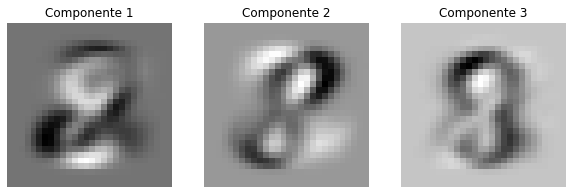

In [191]:
#1b)
w1 = W[:, 0]
w2 = W[:, 1]
w3 = W[:, 2]

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.imshow(w1.reshape((28,28)),cmap='binary')
plt.axis('off')
plt.title('Componente 1')
plt.subplot(132)
plt.imshow(w2.reshape((28,28)),cmap='binary')
plt.axis('off')
plt.title('Componente 2')
plt.subplot(133)
plt.imshow(w3.reshape((28,28)),cmap='binary')
plt.axis('off')
plt.title('Componente 3')

In [192]:
#1c)

#transformar dados 
X2p = np.dot(W.T, X2)

#reconstruçao de dados
X2r = np.dot(W, X2p)

#erro quadratico médio
eqm = np.mean((X2-X2r)**2)
print('Erro Quadrático Médio: ' , eqm)

Erro Quadrático Médio:  12.468215706524644


# Pergunta 2: Considere os dígitos "1", "4" e "7" dos dados (3000 dígitos de treino e 1500 dígitos de teste).
## a) Estime a transformação PCA com os dados de treino, de modo aos dados projetados terem $90\%$ da variância total dos dados e aplique a transformação aos dados de treino e teste. 
## b) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados de treino transformados, e calcule a matriz de confusão e o número total de erros nos dados de teste transformados.
## c) Pretende-se aplicar a transformação LDA aos dados processados com PCA. Estime a transformação LDA com os dados de treino e aplique a transformação aos dados de treino e teste. Faça um "plot"  dos dados de teste por classe no mesmo gráfico.
## d) Treine o classificador $\texttt{SVC(kernel='rbf')}$ com os dados transformados da alínea anterior, e calcule a matriz de confusão e o número total de erros nos dados de teste.

In [193]:
from sklearn.metrics import confusion_matrix as MC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

In [194]:
from sklearn.decomposition import PCA

D = pickle.load(open('MNISTsmall.p', 'rb'))
D.keys()
X = D['X']*1.0
f1 = D['foldTrain']
f2 = D['foldTest']
y = D['trueClass']
X1 = X[:, f1]
y1 = y[f1]
X2 = X[:, f2]
y2 = y[f2]

X1 = X1[:,(y1==1) | (y1==4) | (y1==7)] 
y1 = y1[(y1==1) | (y1==4) | (y1==7)]
X2 = X2[:,(y2==1) | (y2==4) | (y2==7)] 
y2 = y2[(y2==1) | (y2==4) | (y2==7)]

In [195]:
#2a)
pca = PCA(n_components=0.90).fit(X1.T) #90% variancia total
X1p = pca.transform(X1.T)
X2p = pca.transform(X2.T)
print(X2p.shape)

(1500, 67)


In [196]:
#2b)
svm.fit(X1p,y1)
y2e = svm.predict(X2p)
print('Matriz de confusão:\n', MC(y2,y2e))
print('Número total de erros no conjunto de teste:', np.sum(y2!=y2e))

Matriz de confusão:
 [[497   0   3]
 [  0 500   0]
 [ 13   7 480]]
Número total de erros no conjunto de teste: 23


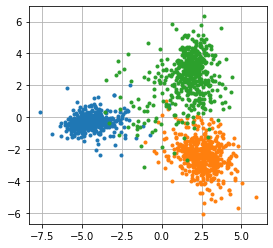

In [197]:
#2c)
lda = LDA().fit(X1p, y1)
X1l = lda.transform(X1p)
X2l = lda.transform(X2p)

plt.plot(X2l[y2==1,0],X2l[y2==1,1],'.')
plt.plot(X2l[y2==4,0],X2l[y2==4,1],'.')
plt.plot(X2l[y2==7,0],X2l[y2==7,1],'.')

plt.axis('scaled')
plt.grid()

In [198]:
#2d)
svm.fit(X1l, y1)
y2e = svm.predict(X2l)
print('Matriz de confusão:\n', MC(y2,y2e))
print('Número total de erros no conjunto de teste:', np.sum(y2!=y2e))

Matriz de confusão:
 [[497   1   2]
 [  0 492   8]
 [ 17  18 465]]
Número total de erros no conjunto de teste: 46
